In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [4]:
data_dir = Path("../Dataset")

dates = ["15-09-2025", "16-09-2025", "18-09-2025"]

color_dfs = []
spectral_dfs = []

for date in dates:
    color = pd.read_csv(data_dir / f"color-{date}.csv")
    spectral = pd.read_csv(data_dir / f"Spectralinfo-{date}.csv")

    color["Date"] = date
    spectral["Date"] = date

    color_dfs.append(color)
    spectral_dfs.append(spectral)

In [6]:
merged_dfs = []
for color, spectral in zip(color_dfs, spectral_dfs):
    merged = pd.merge(color, spectral, on=["Sample", "Date"], how="inner")
    merged_dfs.append(merged)

df = pd.concat(merged_dfs, ignore_index=True)

In [7]:
df.info()
df.describe().T.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Columns: 267 entries, Sample to 850nm
dtypes: float64(265), object(2)
memory usage: 701.0+ KB


,count,mean,std,min,25%,50%,75%,max
R,335.0,234.420896,11.181632,193.000,225.500,236.000,243.000,255.000
G,335.0,208.805970,12.555313,167.000,199.000,212.000,219.000,243.000
B,335.0,90.044776,23.153247,42.000,73.000,87.000,107.000,175.000
C,335.0,20.579104,11.181632,0.000,12.000,19.000,29.500,62.000
M,335.0,46.194030,12.555313,12.000,36.000,43.000,56.000,88.000
Y,335.0,164.955224,23.153247,80.000,148.000,168.000,182.000,213.000
H,335.0,50.337313,1.073474,47.000,50.000,50.000,51.000,53.000
S,335.0,0.500090,0.091161,0.203,0.427,0.503,0.567,0.705
I,335.0,0.697107,0.057679,0.558,0.658,0.697,0.742,0.880
L*,335.0,83.865701,4.370847,69.120,80.425,84.760,87.315,95.350


In [8]:
df.head()

,Sample,R,G,B,C,M,Y,H,S,I,...,838nm,839nm,840nm,842nm,843nm,844nm,846nm,847nm,848nm,850nm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sliced_Cake-_D1-1,242.0,217.0,115.0,13.0,38.0,140.0,49.0,0.399,0.750,...,0.000059,0.000062,0.000058,0.000056,0.000056,0.000060,0.000058,0.000060,0.000058,0.000059
2,Sliced_Cake-_D1-2,219.0,194.0,101.0,36.0,61.0,154.0,48.0,0.411,0.672,...,0.000072,0.000075,0.000070,0.000069,0.000068,0.000073,0.000070,0.000073,0.000070,0.000072
3,Sliced_Cake-_D1-3,224.0,198.0,100.0,31.0,57.0,155.0,49.0,0.425,0.682,...,0.000057,0.000060,0.000056,0.000055,0.000055,0.000059,0.000056,0.000059,0.000056,0.000058
4,Sliced_Cake-_D1-4,220.0,194.0,95.0,35.0,61.0,160.0,49.0,0.440,0.665,...,0.000054,0.000056,0.000053,0.000052,0.000051,0.000055,0.000053,0.000055,0.000053,0.000054


In [9]:
df.shape

(336, 267)

In [10]:
df.drop(0, inplace=True)

In [11]:
df.head()

,Sample,R,G,B,C,M,Y,H,S,I,...,838nm,839nm,840nm,842nm,843nm,844nm,846nm,847nm,848nm,850nm
1,Sliced_Cake-_D1-1,242.0,217.0,115.0,13.0,38.0,140.0,49.0,0.399,0.750,...,0.000059,0.000062,0.000058,0.000056,0.000056,0.000060,0.000058,0.000060,0.000058,0.000059
2,Sliced_Cake-_D1-2,219.0,194.0,101.0,36.0,61.0,154.0,48.0,0.411,0.672,...,0.000072,0.000075,0.000070,0.000069,0.000068,0.000073,0.000070,0.000073,0.000070,0.000072
3,Sliced_Cake-_D1-3,224.0,198.0,100.0,31.0,57.0,155.0,49.0,0.425,0.682,...,0.000057,0.000060,0.000056,0.000055,0.000055,0.000059,0.000056,0.000059,0.000056,0.000058
4,Sliced_Cake-_D1-4,220.0,194.0,95.0,35.0,61.0,160.0,49.0,0.440,0.665,...,0.000054,0.000056,0.000053,0.000052,0.000051,0.000055,0.000053,0.000055,0.000053,0.000054
5,Sliced_Cake-_D1-5,242.0,217.0,104.0,13.0,38.0,151.0,50.0,0.446,0.736,...,0.000038,0.000040,0.000037,0.000036,0.000036,0.000039,0.000037,0.000039,0.000037,0.000038


In [19]:
pd.set_option('display.max_columns', None)

In [20]:
df.head()

,Sample,R,G,B,C,M,Y,H,S,I,L*,a*,b*,Date,340nm,343nm,346nm,348nm,351nm,354nm,356nm,359nm,362nm,364nm,367nm,370nm,372nm,375nm,378nm,380nm,383nm,385nm,388nm,391nm,393nm,396nm,398nm,401nm,404nm,406nm,409nm,411nm,414nm,417nm,419nm,422nm,424nm,427nm,429nm,432nm,434nm,437nm,439nm,442nm,444nm,447nm,450nm,452nm,455nm,457nm,460nm,462nm,465nm,467nm,469nm,472nm,474nm,477nm,479nm,482nm,484nm,487nm,489nm,492nm,494nm,496nm,499nm,501nm,504nm,506nm,508nm,511nm,513nm,516nm,518nm,520nm,523nm,525nm,527nm,530nm,532nm,534nm,537nm,539nm,541nm,544nm,546nm,548nm,551nm,553nm,555nm,557nm,560nm,562nm,564nm,566nm,569nm,571nm,573nm,575nm,578nm,580nm,582nm,584nm,587nm,589nm,591nm,593nm,595nm,597nm,600nm,602nm,604nm,606nm,608nm,610nm,613nm,615nm,617nm,619nm,621nm,623nm,625nm,627nm,629nm,631nm,634nm,636nm,638nm,640nm,642nm,644nm,646nm,648nm,650nm,652nm,654nm,656nm,658nm,660nm,662nm,664nm,666nm,668nm,670nm,672nm,674nm,676nm,677nm,679nm,681nm,683nm,685nm,687nm,689nm,691nm,693nm,695nm,696nm,698nm,700nm,702nm,704nm,706nm,707nm,709nm,711nm,713nm,715nm,717nm,718nm,720nm,722nm,724nm,725nm,727nm,729nm,731nm,732nm,734nm,736nm,738nm,739nm,741nm,743nm,744nm,746nm,748nm,749nm,751nm,753nm,754nm,756nm,758nm,759nm,761nm,763nm,764nm,766nm,767nm,769nm,771nm,772nm,774nm,775nm,777nm,779nm,780nm,782nm,783nm,785nm,786nm,788nm,789nm,791nm,792nm,794nm,795nm,797nm,798nm,800nm,801nm,803nm,804nm,806nm,807nm,809nm,810nm,812nm,813nm,814nm,816nm,817nm,819nm,820nm,821nm,823nm,824nm,826nm,827nm,828nm,830nm,831nm,832nm,834nm,835nm,836nm,838nm,839nm,840nm,842nm,843nm,844nm,846nm,847nm,848nm,850nm
1,Sliced_Cake-_D1-1,242.0,217.0,115.0,13.0,38.0,140.0,49.0,0.399,0.750,86.87,-3.96,52.84,15-09-2025,0.004985,0.001256,0.000487,0.000377,0.000310,0.000246,0.000205,0.000174,0.000147,0.000136,0.000118,0.000110,0.000098,0.000089,0.000089,0.000093,0.000087,0.000088,0.000090,0.000093,0.000094,0.000098,0.000103,0.000115,0.000124,0.000175,0.000291,0.001142,0.011494,0.029490,0.050030,0.070559,0.093262,0.115279,0.138365,0.162632,0.186629,0.211299,0.235256,0.260126,0.290013,0.313603,0.340988,0.365282,0.387968,0.412822,0.441210,0.463405,0.490057,0.512722,0.536614,0.558122,0.580933,0.590047,0.590496,0.590917,0.593622,0.595079,0.598047,0.600515,0.603546,0.608083,0.613516,0.618521,0.625496,0.632324,0.640045,0.646583,0.649233,0.630208,0.614783,0.601858,0.597664,0.604386,0.615240,0.630450,0.647237,0.663857,0.678644,0.691140,0.703081,0.714754,0.725514,0.735951,0.744962,0.753188,0.760512,0.766975,0.773994,0.779991,0.786748,0.793857,0.800135,0.806557,0.813609,0.826781,0.838016,0.843977,0.850159,0.856601,0.862638,0.869443,0.876274,0.883241,0.890490,0.897496,0.902953,0.908718,0.914792,0.920566,0.925907,0.929905,0.933825,0.937441,0.940060,0.941777,0.939387,0.931276,0.922105,0.912274,0.900054,0.885993,0.869587,0.851823,0.832906,0.812191,0.790919,0.767766,0.744260,0.719709,0.649413,0.585099,0.524279,0.469564,0.421101,0.376863,0.337386,0.302162,0.275705,0.250211,0.225238,0.201608,0.180513,0.157951,0.138430,0.119425,0.098465,0.082150,0.059540,0.041932,0.024991,0.006261,0.001509,0.000341,0.000239,0.000182,0.000169,0.000155,0.000154,0.000148,0.000147,0.000147,0.000143,0.000147,0.000137,0.000131,0.000134,0.000136,0.000140,0.000133,0.000140,0.000135,0.000132,0.000128,0.000135,0.000130,0.000131,0.000126,0.000138,0.000128,0.000136,0.000133,0.000135,0.000142,0.000157,0.000149,0.000155,0.000161,0.000159,0.000177,0.000176,0.000177,0.000161,0.000174,0.000177,0.000185,0.000214,0.000214,0.000231,0.000231,0.000244,0.000265,0.000268,0.000296,0.000291,0.000321,0.000341,0.000327,0.000360,0.000358,0.000380,0.000412,0.000400,0.000397,0.000417,0.000408,0.000403,0.000409,0.000419,0.000415,0.000405,0.000411,0.000390,0.000399,0.000399,0.000405,0.000402,0.000400,0.000404,0.000397,0.000398,0.000387,0.000396,0.000387,0.000399,0.000393,0.000058,0.000058,0.000058,0.000058,0.000060,0.000057,0.000058,0.000059,0.000062,0.000058,0.000056,0.000056,0.000060,0.000058,0.000060,0.000058,0.000059
2,Sliced_Cake-_D1-2,219.0,194.0,101.0,36.0,61.0,154.0,48.0,0.411,

In [18]:
df.info

<bound method DataFrame.info of                  Sample      R      G      B     C     M      Y     H      S  \
1     Sliced_Cake-_D1-1  242.0  217.0  115.0  13.0  38.0  140.0  49.0  0.399   
2     Sliced_Cake-_D1-2  219.0  194.0  101.0  36.0  61.0  154.0  48.0  0.411   
3     Sliced_Cake-_D1-3  224.0  198.0  100.0  31.0  57.0  155.0  49.0  0.425   
4     Sliced_Cake-_D1-4  220.0  194.0   95.0  35.0  61.0  160.0  49.0  0.440   
5     Sliced_Cake-_D1-5  242.0  217.0  104.0  13.0  38.0  151.0  50.0  0.446   
..                  ...    ...    ...    ...   ...   ...    ...   ...    ...   
331   D3_sliced_cake-97  231.0  203.0   67.0  24.0  52.0  188.0  51.0  0.599   
332   D3_sliced_cake-98  233.0  206.0   64.0  22.0  49.0  191.0  51.0  0.618   
333   D3_sliced_cake-99  229.0  201.0   64.0  26.0  54.0  191.0  51.0  0.611   
334  D3_sliced_cake-100  224.0  195.0   61.0  31.0  60.0  194.0  50.0  0.619   
335  D3_sliced_cake-101  226.0  199.0   67.0  29.0  56.0  188.0  51.0  0.591   

       

In [12]:
df.shape

(335, 267)

In [13]:
df.isnull().sum()

Sample    0
R         0
G         0
B         0
C         0
         ..
844nm     0
846nm     0
847nm     0
848nm     0
850nm     0
Length: 267, dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
columns_with_nan = df.isnull().any()
print(columns_with_nan)

Sample    False
R         False
G         False
B         False
C         False
          ...  
844nm     False
846nm     False
847nm     False
848nm     False
850nm     False
Length: 267, dtype: bool


In [22]:
df.head()

,Sample,R,G,B,C,M,Y,H,S,I,L*,a*,b*,Date,340nm,343nm,346nm,348nm,351nm,354nm,356nm,359nm,362nm,364nm,367nm,370nm,372nm,375nm,378nm,380nm,383nm,385nm,388nm,391nm,393nm,396nm,398nm,401nm,404nm,406nm,409nm,411nm,414nm,417nm,419nm,422nm,424nm,427nm,429nm,432nm,434nm,437nm,439nm,442nm,444nm,447nm,450nm,452nm,455nm,457nm,460nm,462nm,465nm,467nm,469nm,472nm,474nm,477nm,479nm,482nm,484nm,487nm,489nm,492nm,494nm,496nm,499nm,501nm,504nm,506nm,508nm,511nm,513nm,516nm,518nm,520nm,523nm,525nm,527nm,530nm,532nm,534nm,537nm,539nm,541nm,544nm,546nm,548nm,551nm,553nm,555nm,557nm,560nm,562nm,564nm,566nm,569nm,571nm,573nm,575nm,578nm,580nm,582nm,584nm,587nm,589nm,591nm,593nm,595nm,597nm,600nm,602nm,604nm,606nm,608nm,610nm,613nm,615nm,617nm,619nm,621nm,623nm,625nm,627nm,629nm,631nm,634nm,636nm,638nm,640nm,642nm,644nm,646nm,648nm,650nm,652nm,654nm,656nm,658nm,660nm,662nm,664nm,666nm,668nm,670nm,672nm,674nm,676nm,677nm,679nm,681nm,683nm,685nm,687nm,689nm,691nm,693nm,695nm,696nm,698nm,700nm,702nm,704nm,706nm,707nm,709nm,711nm,713nm,715nm,717nm,718nm,720nm,722nm,724nm,725nm,727nm,729nm,731nm,732nm,734nm,736nm,738nm,739nm,741nm,743nm,744nm,746nm,748nm,749nm,751nm,753nm,754nm,756nm,758nm,759nm,761nm,763nm,764nm,766nm,767nm,769nm,771nm,772nm,774nm,775nm,777nm,779nm,780nm,782nm,783nm,785nm,786nm,788nm,789nm,791nm,792nm,794nm,795nm,797nm,798nm,800nm,801nm,803nm,804nm,806nm,807nm,809nm,810nm,812nm,813nm,814nm,816nm,817nm,819nm,820nm,821nm,823nm,824nm,826nm,827nm,828nm,830nm,831nm,832nm,834nm,835nm,836nm,838nm,839nm,840nm,842nm,843nm,844nm,846nm,847nm,848nm,850nm
1,Sliced_Cake-_D1-1,242.0,217.0,115.0,13.0,38.0,140.0,49.0,0.399,0.750,86.87,-3.96,52.84,15-09-2025,0.004985,0.001256,0.000487,0.000377,0.000310,0.000246,0.000205,0.000174,0.000147,0.000136,0.000118,0.000110,0.000098,0.000089,0.000089,0.000093,0.000087,0.000088,0.000090,0.000093,0.000094,0.000098,0.000103,0.000115,0.000124,0.000175,0.000291,0.001142,0.011494,0.029490,0.050030,0.070559,0.093262,0.115279,0.138365,0.162632,0.186629,0.211299,0.235256,0.260126,0.290013,0.313603,0.340988,0.365282,0.387968,0.412822,0.441210,0.463405,0.490057,0.512722,0.536614,0.558122,0.580933,0.590047,0.590496,0.590917,0.593622,0.595079,0.598047,0.600515,0.603546,0.608083,0.613516,0.618521,0.625496,0.632324,0.640045,0.646583,0.649233,0.630208,0.614783,0.601858,0.597664,0.604386,0.615240,0.630450,0.647237,0.663857,0.678644,0.691140,0.703081,0.714754,0.725514,0.735951,0.744962,0.753188,0.760512,0.766975,0.773994,0.779991,0.786748,0.793857,0.800135,0.806557,0.813609,0.826781,0.838016,0.843977,0.850159,0.856601,0.862638,0.869443,0.876274,0.883241,0.890490,0.897496,0.902953,0.908718,0.914792,0.920566,0.925907,0.929905,0.933825,0.937441,0.940060,0.941777,0.939387,0.931276,0.922105,0.912274,0.900054,0.885993,0.869587,0.851823,0.832906,0.812191,0.790919,0.767766,0.744260,0.719709,0.649413,0.585099,0.524279,0.469564,0.421101,0.376863,0.337386,0.302162,0.275705,0.250211,0.225238,0.201608,0.180513,0.157951,0.138430,0.119425,0.098465,0.082150,0.059540,0.041932,0.024991,0.006261,0.001509,0.000341,0.000239,0.000182,0.000169,0.000155,0.000154,0.000148,0.000147,0.000147,0.000143,0.000147,0.000137,0.000131,0.000134,0.000136,0.000140,0.000133,0.000140,0.000135,0.000132,0.000128,0.000135,0.000130,0.000131,0.000126,0.000138,0.000128,0.000136,0.000133,0.000135,0.000142,0.000157,0.000149,0.000155,0.000161,0.000159,0.000177,0.000176,0.000177,0.000161,0.000174,0.000177,0.000185,0.000214,0.000214,0.000231,0.000231,0.000244,0.000265,0.000268,0.000296,0.000291,0.000321,0.000341,0.000327,0.000360,0.000358,0.000380,0.000412,0.000400,0.000397,0.000417,0.000408,0.000403,0.000409,0.000419,0.000415,0.000405,0.000411,0.000390,0.000399,0.000399,0.000405,0.000402,0.000400,0.000404,0.000397,0.000398,0.000387,0.000396,0.000387,0.000399,0.000393,0.000058,0.000058,0.000058,0.000058,0.000060,0.000057,0.000058,0.000059,0.000062,0.000058,0.000056,0.000056,0.000060,0.000058,0.000060,0.000058,0.000059
2,Sliced_Cake-_D1-2,219.0,194.0,101.0,36.0,61.0,154.0,48.0,0.411,

In [23]:
column_names = df.columns
print(column_names)

Index(['Sample', 'R', 'G', 'B', 'C', 'M', 'Y', 'H', 'S', 'I',
       ...
       '838nm', '839nm', '840nm', '842nm', '843nm', '844nm', '846nm', '847nm',
       '848nm', '850nm'],
      dtype='object', length=267)


In [24]:
print(df.columns.tolist())

['Sample', 'R', 'G', 'B', 'C', 'M', 'Y', 'H', 'S', 'I', 'L* ', 'a*', 'b*', 'Date', '340nm', '343nm', '346nm', '348nm', '351nm', '354nm', '356nm', '359nm', '362nm', '364nm', '367nm', '370nm', '372nm', '375nm', '378nm', '380nm', '383nm', '385nm', '388nm', '391nm', '393nm', '396nm', '398nm', '401nm', '404nm', '406nm', '409nm', '411nm', '414nm', '417nm', '419nm', '422nm', '424nm', '427nm', '429nm', '432nm', '434nm', '437nm', '439nm', '442nm', '444nm', '447nm', '450nm', '452nm', '455nm', '457nm', '460nm', '462nm', '465nm', '467nm', '469nm', '472nm', '474nm', '477nm', '479nm', '482nm', '484nm', '487nm', '489nm', '492nm', '494nm', '496nm', '499nm', '501nm', '504nm', '506nm', '508nm', '511nm', '513nm', '516nm', '518nm', '520nm', '523nm', '525nm', '527nm', '530nm', '532nm', '534nm', '537nm', '539nm', '541nm', '544nm', '546nm', '548nm', '551nm', '553nm', '555nm', '557nm', '560nm', '562nm', '564nm', '566nm', '569nm', '571nm', '573nm', '575nm', '578nm', '580nm', '582nm', '584nm', '587nm', '589nm',

In [26]:
# Strip whitespace and ensure consistent ASCII
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\u202a', '', regex=True)  # remove hidden LTR markers
df.columns = df.columns.str.replace('\u202c', '', regex=True)

C:\Users\91945\AppData\Local\Temp\ipykernel_19724\1536131345.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Date", y=col, data=df, palette="viridis")
C:\Users\91945\AppData\Local\Temp\ipykernel_19724\1536131345.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Date", y=col, data=df, palette="viridis")
C:\Users\91945\AppData\Local\Temp\ipykernel_19724\1536131345.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Date", y=col, data=df, palette="viridis")


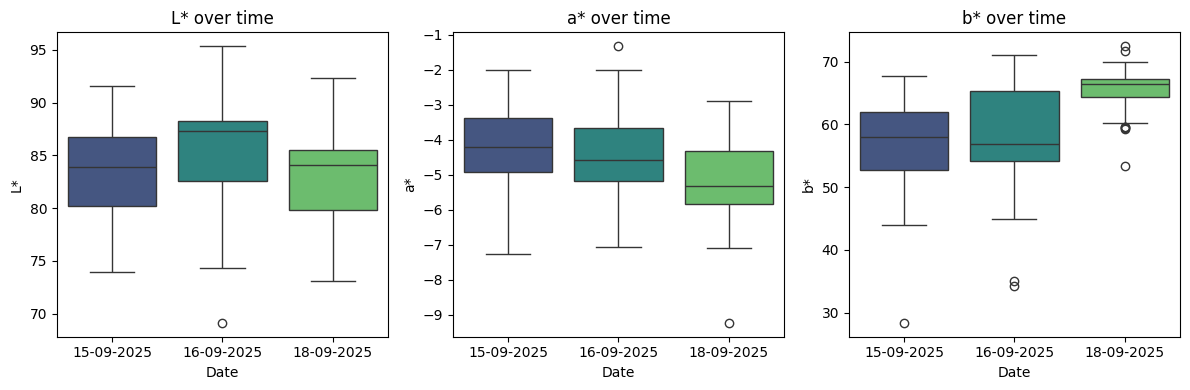

In [28]:
color_cols = ["L*", "a*", "b*"]

plt.figure(figsize=(12, 4))
for i, col in enumerate(color_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x="Date", y=col, data=df, palette="viridis")
    plt.title(f"{col} over time")
plt.tight_layout()
plt.show()

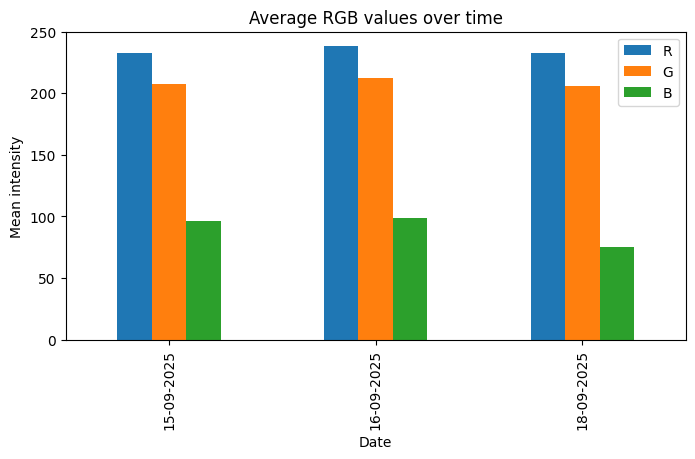

In [29]:
rgb_cols = ["R", "G", "B"]
df.groupby("Date")[rgb_cols].mean().plot(kind="bar", figsize=(8,4))
plt.title("Average RGB values over time")
plt.ylabel("Mean intensity")
plt.show()

In [30]:
date_map = {
    "15-09-2025": "Day1",
    "16-09-2025": "Day2",
    "18-09-2025": "Day3"
}

In [31]:
df["Date"] = df["Date"].replace(date_map)

In [32]:
df["Date"].unique()

array(['Day1', 'Day2', 'Day3'], dtype=object)

In [33]:
wavelength_cols = [col for col in df.columns if "nm" in col]
print(f"Spectral range: {wavelength_cols[0]}–{wavelength_cols[-1]}")

Spectral range: 340nm–850nm


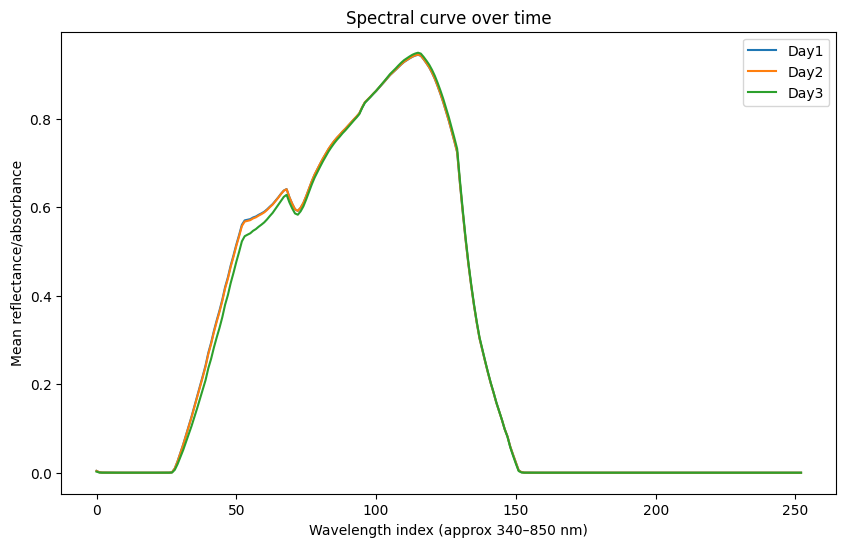

In [34]:
plt.figure(figsize=(10,6))
for date, sub in df.groupby("Date"):
    plt.plot(range(len(wavelength_cols)),
             sub[wavelength_cols].mean(),
             label=date)
plt.xlabel("Wavelength index (approx 340–850 nm)")
plt.ylabel("Mean reflectance/absorbance")
plt.title("Spectral curve over time")
plt.legend()
plt.show()

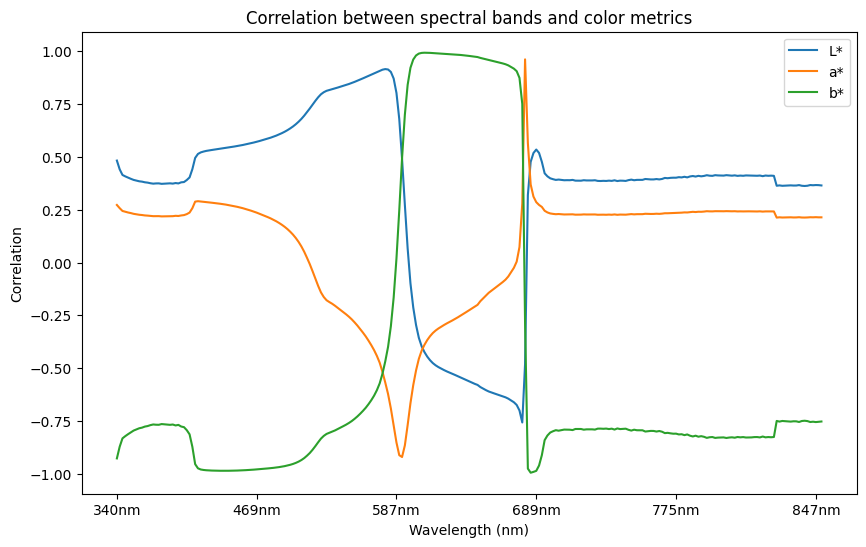

In [35]:
corrs = {}
for color_var in color_cols:
    corrs[color_var] = [df[color_var].corr(df[w]) for w in wavelength_cols]

corr_df = pd.DataFrame(corrs, index=wavelength_cols)
corr_df.plot(figsize=(10,6))
plt.title("Correlation between spectral bands and color metrics")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Correlation")
plt.show()

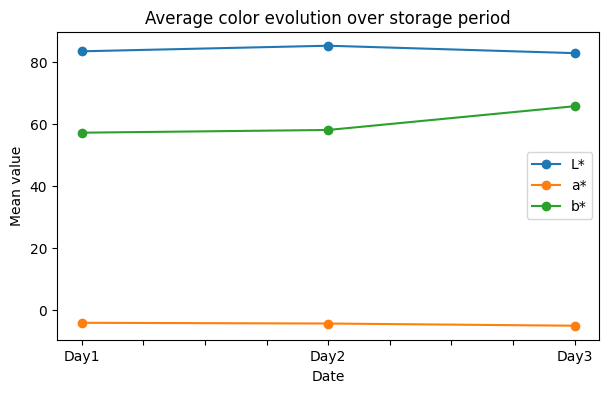

In [36]:
trend = df.groupby("Date")[["L*", "a*", "b*"]].mean()
trend.plot(marker='o', figsize=(7,4))
plt.title("Average color evolution over storage period")
plt.ylabel("Mean value")
plt.show()

## Linear or PLS correlation between spectra and color

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

wavelength_cols = [c for c in df.columns if "nm" in c]
X = df[wavelength_cols].values
Y = df[["L*", "a*", "b*"]].values 

# Standardize predictors (PLS prefers standardized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
r2_scores = {}
for i, col in enumerate(["L*", "a*", "b*"]):
    lr = LinearRegression()
    lr.fit(X_scaled, Y[:, i])
    pred = lr.predict(X_scaled)
    r2_scores[col] = r2_score(Y[:, i], pred)

print("R² scores (linear fit using all bands):", r2_scores)

R² scores (linear fit using all bands): {'L*': 0.9943028003607379, 'a*': 0.9946244366581032, 'b*': 0.9949124486081907}


In [43]:
pls = PLSRegression(n_components=5)
pls.fit(X_scaled, Y)
Y_pred = pls.predict(X_scaled)

r2_L, r2_a, r2_b = [r2_score(Y[:, i], Y_pred[:, i]) for i in range(3)]

print(f"PLS R² Scores:\nL*: {r2_L:.3f}, a*: {r2_a:.3f}, b*: {r2_b:.3f}")

PLS R² Scores:
L*: 0.956, a*: 0.972, b*: 0.991


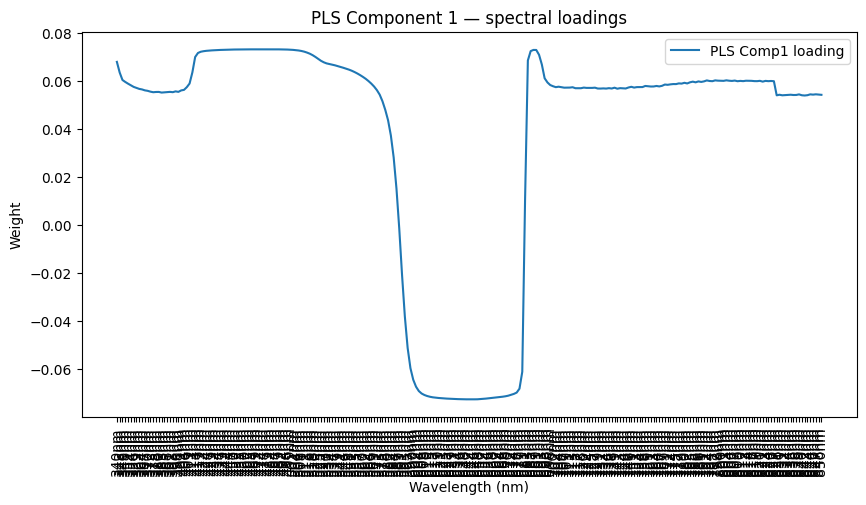

In [46]:
pls_df = pd.DataFrame(pls.x_weights_, columns=["Comp1", "Comp2", "Comp3", "Comp4", "Comp5"], index=wavelength_cols)
plt.figure(figsize=(10,5))
plt.plot(pls_df.index, pls_df["Comp1"], label="PLS Comp1 loading")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Weight")
plt.title("PLS Component 1 — spectral loadings")
plt.xticks(rotation=90)
plt.legend()
plt.show()

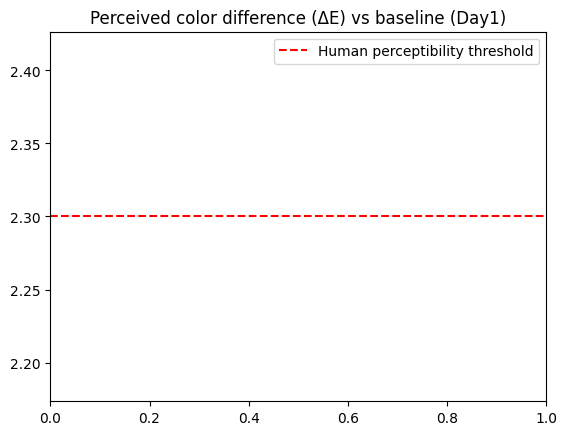

In [48]:
from math import sqrt

# helper function
def deltaE(row):
    return sqrt((row["L*_curr"] - row["L*_base"])**2 +
                (row["a*_curr"] - row["a*_base"])**2 +
                (row["b*_curr"] - row["b*_base"])**2)

base = df[df["Date"] == "Day1"][["Sample", "L*", "a*", "b*"]]

deltaE_list = []
for day in ["Day2", "Day3"]:
    curr = df[df["Date"] == day][["Sample","L*","a*","b*"]]
    merged = pd.merge(base, curr, on="Sample", suffixes=("_base", "_curr"))
    merged["DeltaE"] = merged.apply(deltaE, axis=1)
    merged["Date"] = day
    deltaE_list.append(merged[["Sample","Date","DeltaE"]])

deltaE_df = pd.concat(deltaE_list)

sns.boxplot(x="Date", y="DeltaE", data=deltaE_df, palette="plasma")
plt.axhline(2.3, color="red", linestyle="--", label="Human perceptibility threshold")
plt.legend()
plt.title("Perceived color difference (ΔE) vs baseline (Day1)")
plt.show()

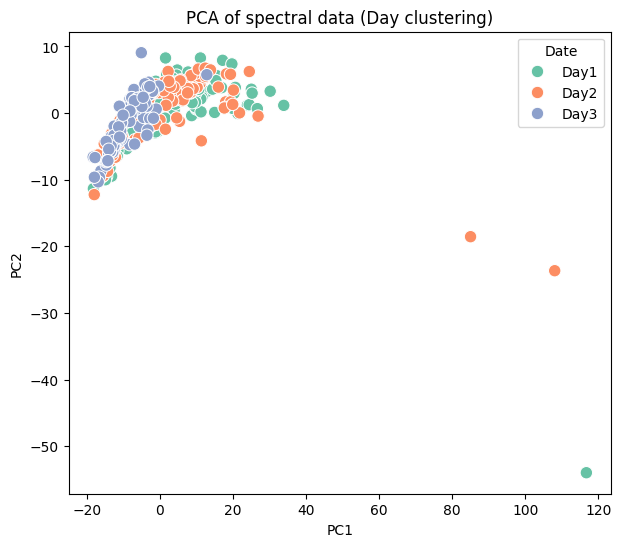

Explained variance:  [0.83907034 0.11559289]


In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
spec_scores = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(spec_scores, columns=["PC1", "PC2"])
df_pca["Date"] = df["Date"]

plt.figure(figsize=(7,6))
sns.scatterplot(x="PC1", y="PC2", hue="Date", data=df_pca, palette="Set2", s=80)
plt.title("PCA of spectral data (Day clustering)")
plt.show()

print("Explained variance: ", pca.explained_variance_ratio_)

              precision    recall  f1-score   support

        Day1       0.68      0.70      0.69        33
        Day2       0.52      0.48      0.50        27
        Day3       0.72      0.75      0.73        24

    accuracy                           0.64        84
   macro avg       0.64      0.64      0.64        84
weighted avg       0.64      0.64      0.64        84



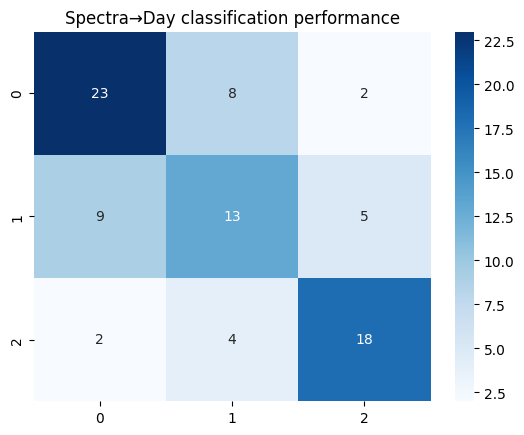

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled, df["Date"], test_size=0.25, random_state=42)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d", cmap="Blues")
plt.title("Spectra→Day classification performance")
plt.show()

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train, Y[:len(X_train)])  # approximate alignment for demonstration
Y_pred_rf = rf_reg.predict(X_test)

print("Feature importance peak wavelengths (top 10):")
importance = pd.Series(rf_reg.feature_importances_, index=wavelength_cols)
print(importance.sort_values(ascending=False).head(10))

Feature importance peak wavelengths (top 10):
681nm    0.080566
589nm    0.046314
683nm    0.039577
593nm    0.034839
597nm    0.034328
591nm    0.033798
679nm    0.033382
587nm    0.032557
595nm    0.030933
584nm    0.030792
dtype: float64


In [54]:
df.to_csv('dataset_combined.csv')